In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomContrast
import numpy as np
import matplotlib.pyplot as plt
import os

DATA_DIR = 'E:\\Projects\\animal_classification\\Animal Classification\\dataset'

In [7]:
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    labels='inferred',
    label_mode='categorical',
    image_size=IMAGE_SIZE,
    interpolation='nearest',
    batch_size=BATCH_SIZE,
    shuffle=True,
    validation_split=VALIDATION_SPLIT,
    subset='training',
    seed=123
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    labels='inferred',
    label_mode='categorical',
    image_size=IMAGE_SIZE,
    interpolation='nearest',
    batch_size=BATCH_SIZE,
    shuffle=False,
    validation_split=VALIDATION_SPLIT,
    subset='validation',
    seed=123
)

Found 1944 files belonging to 15 classes.
Using 1556 files for training.
Found 1944 files belonging to 15 classes.
Using 388 files for validation.


In [9]:
class_names = train_ds.class_names
NUM_CLASSES = len(class_names)
print(f"Detected {NUM_CLASSES} classes: {class_names}")

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

data_augmentation = Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2),
    RandomZoom(0.2),
    RandomContrast(0.2),
], name="data_augmentation")


Detected 15 classes: ['Bear', 'Bird', 'Cat', 'Cow', 'Deer', 'Dog', 'Dolphin', 'Elephant', 'Giraffe', 'Horse', 'Kangaroo', 'Lion', 'Panda', 'Tiger', 'Zebra']


C:\Users\tanis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 50s 677ms/step - accuracy: 0.0960 - loss: 2.7392 - val_accuracy: 0.1985 - val_loss: 2.6428
Epoch 2/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 30s 613ms/step - accuracy: 0.1459 - loss: 2.5641 - val_accuracy: 0.3660 - val_loss: 2.0371
Epoch 3/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 29s 593ms/step - accuracy: 0.2087 - loss: 2.4206 - val_accuracy: 0.6340 - val_loss: 1.2463
Epoch 4/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 30s 620ms/step - accuracy: 0.2715 - loss: 2.2607 - val_accuracy: 0.4974 - val_loss: 1.5235
Epoch 5/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 29s 596ms/step - accuracy: 0.2912 - loss: 2.1497 - val_accuracy: 0.7526 - val_loss: 0.9594
Epoch 6/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 29s 594ms/step - accuracy: 0.3487 - loss: 2.0438 - val_accuracy: 0.6727 - val_loss: 1.3251
Epoch 7/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 30s 604ms/step - accuracy: 0.3546 - loss: 1.9902 - val_accuracy: 0.7062 - val_loss: 1.3023
Epoch 8/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 29s 600ms/step - accuracy: 0.3525 - loss: 1.9313 - 

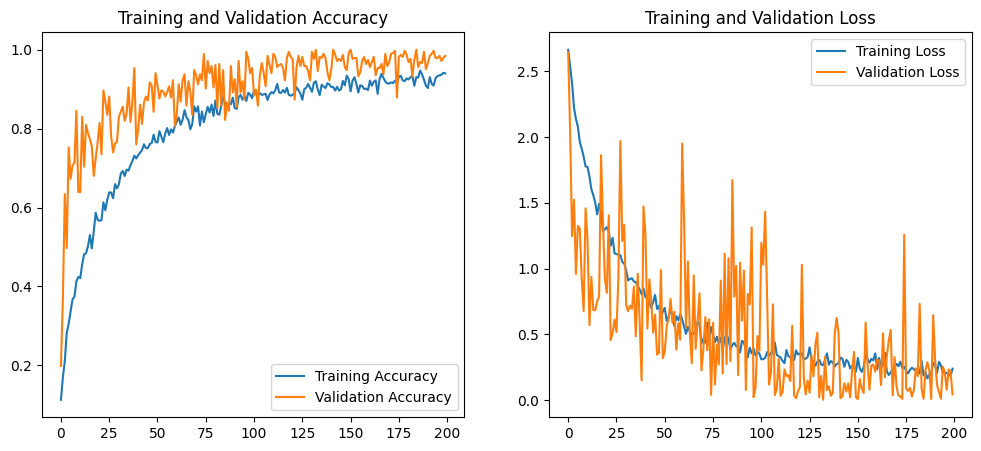

Model saved as 'animal_classifier.keras'


In [10]:
model = Sequential([
    data_augmentation,
    Rescaling(1./255), 
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

EPOCHS = 200

history = model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds,
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

model.save('animal_classifier.keras')
print("Model saved as 'animal_classifier.keras'")

Configured to use CPU only.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step

Predicted class: Bear
Confidence: 99.91%


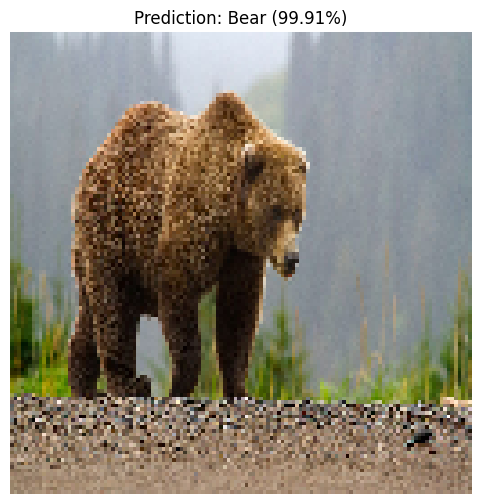

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

tf.config.set_visible_devices([], 'GPU')
print("Configured to use CPU only.")

MODEL_PATH = 'animal_classifier.keras' 
IMAGE_PATH = "C:\\Users\\tanis\\Downloads\\bhalu.jpg" 

IMAGE_SIZE = (128, 128) 

CLASS_NAMES = sorted([
    'Bear', 'Bird', 'Cat', 'Cow', 'Deer', 'Dog', 'Dolphin', 'Elephant', 
    'Giraffe', 'Horse', 'Kangaroo', 'Lion', 'Panda', 'Tiger', 'Zebra'
])

model = tf.keras.models.load_model(MODEL_PATH)

def preprocess_image(image_path, target_size):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) 
    return img_array

test_image_array = preprocess_image(IMAGE_PATH, IMAGE_SIZE)

predictions = model.predict(test_image_array)

predicted_probabilities = predictions[0] 
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class_name = CLASS_NAMES[predicted_class_index]
confidence = predicted_probabilities[predicted_class_index] * 100

print(f"\nPredicted class: {predicted_class_name}")
print(f"Confidence: {confidence:.2f}%")

plt.figure(figsize=(6, 6))
display_img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=IMAGE_SIZE)
plt.imshow(display_img)
plt.title(f"Prediction: {predicted_class_name} ({confidence:.2f}%)")
plt.axis('off')
plt.show()